In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

Dados gerados:
                          Nome  Nota
0                Clara Pacheco     8
1     Gustavo Henrique Rezende     1
2           Dr. Apollo Pacheco    10
3  Dr. Gustavo Henrique Cirino     1
4               Mateus Camargo     1

Dados salvos em 'novo_dados.txt'

Dados carregados do arquivo:
                          Nome  Nota
0                Clara Pacheco     8
1     Gustavo Henrique Rezende     1
2           Dr. Apollo Pacheco    10
3  Dr. Gustavo Henrique Cirino     1
4               Mateus Camargo     1


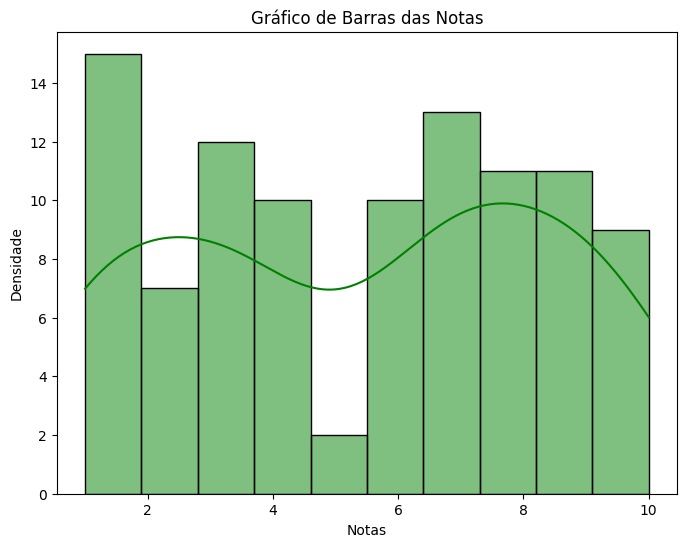

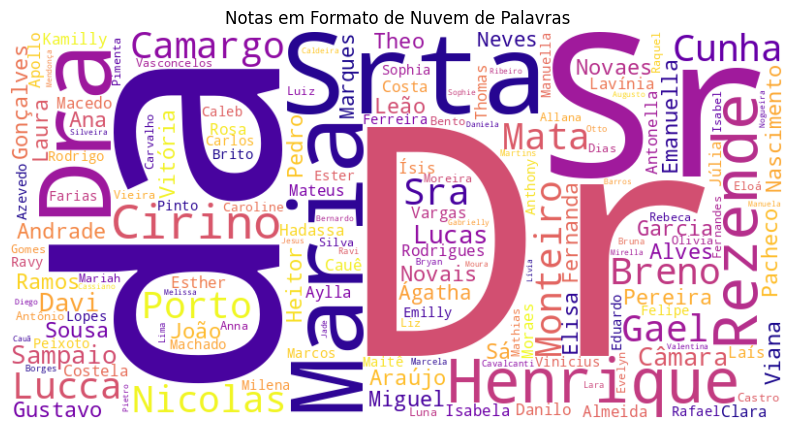

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def gerar_dados(num_entradas=100):
    fake = Faker('pt_BR')
    dados = [(fake.name(), fake.random_int(min=1, max=10)) for _ in range(num_entradas)]
    df_novo = pd.DataFrame(dados, columns=["Nome", "Nota"])
    return df_novo

def salvar_dados_para_arquivo(df_novo, nome_arquivo="novo_dados.txt"):
    df_novo.to_csv(nome_arquivo, index=False, sep='\t')

def carregar_dados_do_arquivo(nome_arquivo="novo_dados.txt"):
    df_novo = pd.read_csv(nome_arquivo, sep='\t')
    return df_novo

def plotar_grafico_barras(df_novo):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_novo["Nota"], bins=10, color='green', kde=True)
    plt.title('Gráfico de Barras das Notas')
    plt.xlabel('Notas')
    plt.ylabel('Densidade')
    plt.show()

def plotar_wordcloud(df_novo):
    text = ' '.join([f"{linha['Nome']} {linha['Nota']}" for _, linha in df_novo.iterrows()])
    nuvem_palavras = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.title('Notas em Formato de Nuvem de Palavras')
    plt.show()

if __name__ == "__main__":
    df_novo = gerar_dados(100)
    print("Dados gerados:")
    print(df_novo.head())

    salvar_dados_para_arquivo(df_novo)
    print("\nDados salvos em 'novo_dados.txt'")

    df_novo_carregado = carregar_dados_do_arquivo()
    print("\nDados carregados do arquivo:")
    print(df_novo_carregado.head())

    plotar_grafico_barras(df_novo_carregado)
    plotar_wordcloud(df_novo_carregado)